In [1]:
import warnings
warnings.filterwarnings('ignore') #para ignorar erros
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #biblitoca para gráficos
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix #métricas de classificação

#Importa os métodos de classificação

# importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#import KNN
from sklearn.neighbors import KNeighborsClassifier
#import Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import SVM
from sklearn.svm import SVC
#import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# no null values overall
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


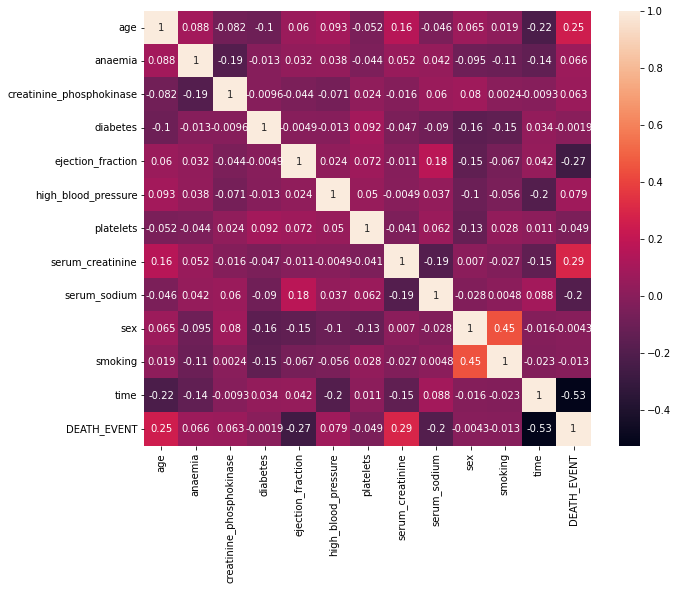

In [5]:
#gráfico de correlação entre as variáveis
plt.figure(figsize = (10,8))
sns.heatmap(df_heart.corr(),annot=True)

In [10]:
#conta as diferentes classes
print("Contagem da variável output")
df_heart['DEATH_EVENT'].value_counts()

Contagem da variável output


0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [11]:
print("Contagem da variável rest_ecg")
df_heart['DEATH_EVENT'].value_counts()

Contagem da variável rest_ecg


0    203
1     96
Name: DEATH_EVENT, dtype: int64

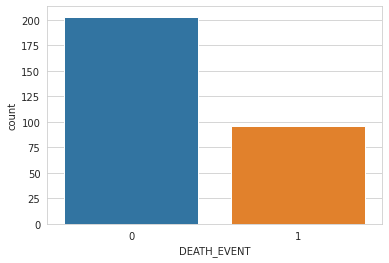

In [13]:
#exibe gráfico com os plots
sns.set_style('whitegrid')
sns.countplot(df_heart['DEATH_EVENT'])

In [14]:
X = df_heart.drop('DEATH_EVENT', axis = 1)
y = df_heart['DEATH_EVENT']

In [15]:
#separa os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
print(X_train)

        age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
224  58.000        0                       582  ...    1        0   205
68   70.000        0                       161  ...    0        0    66
222  42.000        1                        86  ...    1        1   201
37   82.000        1                       855  ...    0        0    30
16   87.000        1                       149  ...    1        0    14
..      ...      ...                       ...  ...  ...      ...   ...
188  60.667        1                       151  ...    0        0   172
71   58.000        0                       582  ...    1        1    71
106  55.000        0                       748  ...    1        0    88
270  44.000        0                       582  ...    1        1   244
102  80.000        0                       898  ...    1        1    87

[209 rows x 12 columns]


In [17]:
#transforma os dados na mesma escala - normaliza os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
print(X_train)

[[-0.23715146 -0.85280287  0.00723085 ...  0.76376262 -0.65689181
   0.91716729]
 [ 0.79246571 -0.85280287 -0.44852519 ... -1.30930734 -0.65689181
  -0.86699147]
 [-1.60997435  1.17260394 -0.52971688 ...  0.76376262  1.5223207
   0.86582459]
 ...
 [-0.49455575 -0.85280287  0.18693513 ...  0.76376262 -0.65689181
  -0.58460663]
 [-1.43837149 -0.85280287  0.00723085 ...  0.76376262  1.5223207
   1.41775859]
 [ 1.65048002 -0.85280287  0.34931852 ...  0.76376262  1.5223207
  -0.5974423 ]]


In [19]:
#realiza o treinamento no modelo RandomForest
ran_fc = RandomForestClassifier()
ran_fc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
#realiza a predição ou seja o teste
rfc_pred = ran_fc.predict(X_test)

In [22]:
print("Resultado do Modelo RandomForest")
print(classification_report(y_test, rfc_pred)) #realiza a comparação entre o real e o predito

Resultado do Modelo RandomForest
              precision    recall  f1-score   support

           0       0.73      0.92      0.82        53
           1       0.83      0.51      0.63        37

    accuracy                           0.76        90
   macro avg       0.78      0.72      0.72        90
weighted avg       0.77      0.76      0.74        90



Resultado da matriz de Confusão do RandomForest


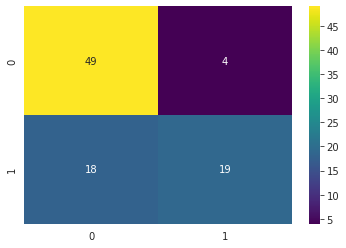

In [23]:
print("Resultado da matriz de Confusão do RandomForest")
confu_mat = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [24]:
#realiza o treinamento no modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

#realiza a predição
knn_pred = knn_model.predict(X_test)

Resultado do Modelo KNN
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        53
           1       1.00      0.27      0.43        37

    accuracy                           0.70        90
   macro avg       0.83      0.64      0.61        90
weighted avg       0.80      0.70      0.64        90

Resultado da matriz de Confusão do KNN


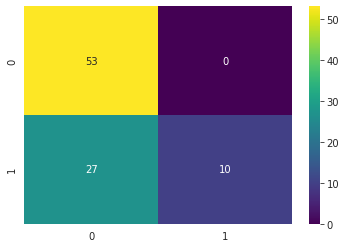

In [25]:
print("Resultado do Modelo KNN")
print(classification_report(y_test, knn_pred))
print("Resultado da matriz de Confusão do KNN")
confu_mat = confusion_matrix(y_test, knn_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [26]:
#realiza o treinamento no modelo Gaussiano
gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)

#realiza a predição
gaus_pred = gaus_model.predict(X_test)


Resultado do Modelo Naive Bayes
              precision    recall  f1-score   support

           0       0.68      0.92      0.78        53
           1       0.78      0.38      0.51        37

    accuracy                           0.70        90
   macro avg       0.73      0.65      0.65        90
weighted avg       0.72      0.70      0.67        90

Resultado da matriz de Naive Bayes


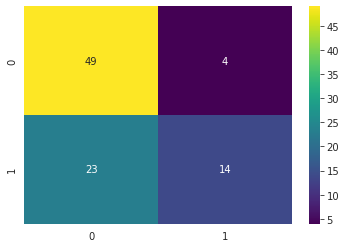

In [27]:
print("Resultado do Modelo Naive Bayes")
print(classification_report(y_test, gaus_pred))
print("Resultado da matriz de Naive Bayes")
confu_mat = confusion_matrix(y_test, gaus_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [28]:
#realiza o treinamento no modelo SVM
svm_model = SVC() 
svm_model.fit(X_train, y_train)

#realiza a predição
svm_pred = svm_model.predict(X_test)

Resultado do Modelo SVM
              precision    recall  f1-score   support

           0       0.69      0.94      0.80        53
           1       0.83      0.41      0.55        37

    accuracy                           0.72        90
   macro avg       0.76      0.67      0.67        90
weighted avg       0.75      0.72      0.70        90

Resultado da matriz de SVM


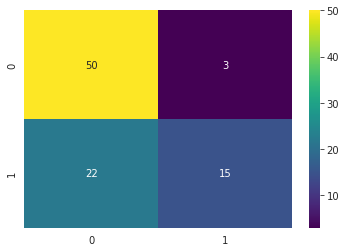

In [29]:
print("Resultado do Modelo SVM")
print(classification_report(y_test, svm_pred))
print("Resultado da matriz de SVM")
confu_mat = confusion_matrix(y_test, svm_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [30]:
#realiza o treinamento no modelo Tree
tree_model = DecisionTreeClassifier() 
tree_model.fit(X_train, y_train)

#realiza a predição
tree_pred = tree_model.predict(X_test)


Resultado do Modelo Tree
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        53
           1       0.59      0.51      0.55        37

    accuracy                           0.66        90
   macro avg       0.64      0.63      0.64        90
weighted avg       0.65      0.66      0.65        90

Resultado da matriz de Tree


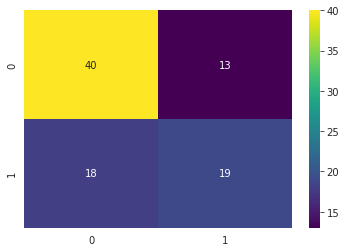

In [31]:
print("Resultado do Modelo Tree")
print(classification_report(y_test, tree_pred))
print("Resultado da matriz de Tree")
confu_mat = confusion_matrix(y_test, tree_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [32]:
#realiza o treinamento no modelo Rede Neural Multi Layer Perceptron
mlp_model = MLPClassifier(random_state=1, max_iter=300) 
mlp_model.fit(X_train, y_train)

#realiza a predição
mlp_pred = mlp_model.predict(X_test)

Resultado do Modelo Rede Neural Multi Layer Perceptron
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        53
           1       0.85      0.46      0.60        37

    accuracy                           0.74        90
   macro avg       0.78      0.70      0.70        90
weighted avg       0.77      0.74      0.72        90

Resultado da matriz Rede Neural Multi Layer Perceptron


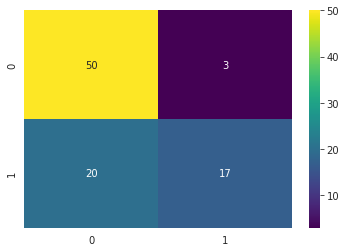

In [33]:
print("Resultado do Modelo Rede Neural Multi Layer Perceptron")
print(classification_report(y_test, mlp_pred))
print("Resultado da matriz Rede Neural Multi Layer Perceptron")
confu_mat = confusion_matrix(y_test, mlp_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')